# 연령별 인구 분포 비교 분석
- 행정안전부 주민등록 인구 통계: https://jumin.mois.go.kr/
- 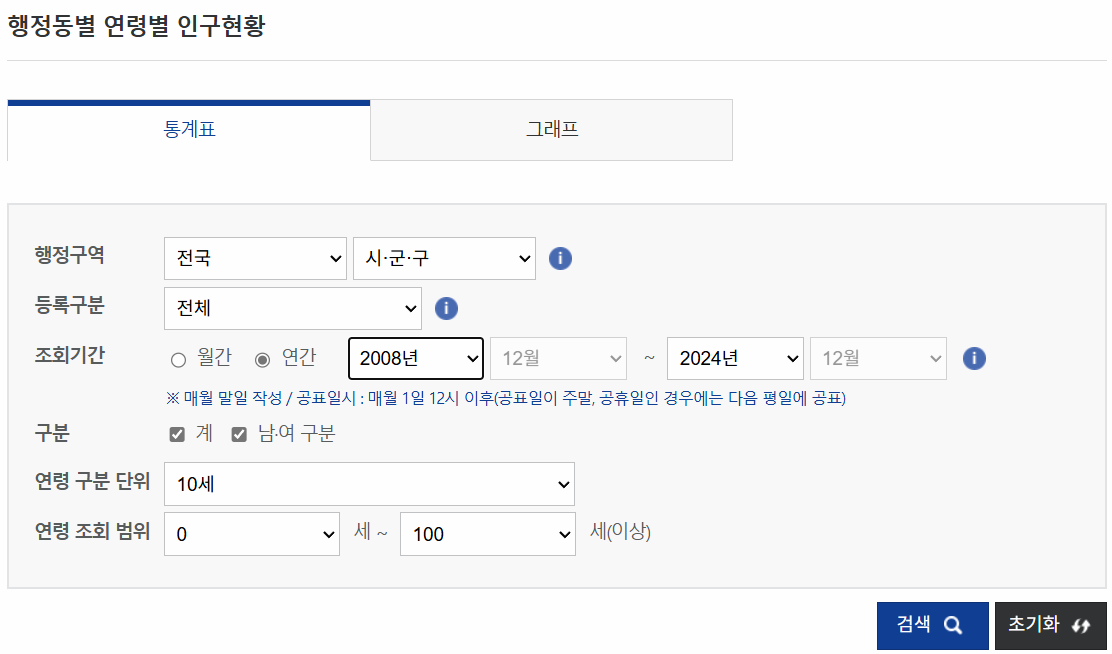
- 행정동별 연령별 인구현황
- 현재 6년간씩 조회가능할것 2008 ~ 2024

In [1]:
# !pip install seaborn

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import pandas as pd
import numpy as np
import seaborn as sns

from hdfs import InsecureClient

Text(0.2, 0.4, '한글')

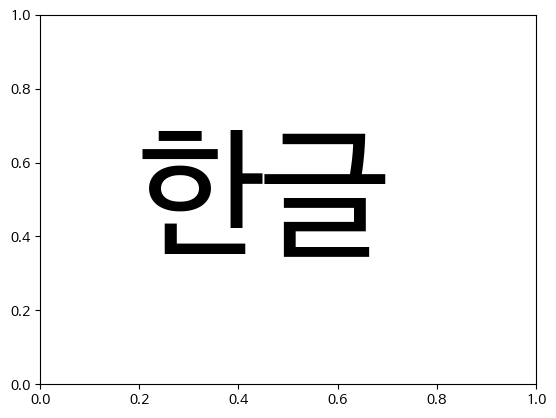

In [3]:
from matplotlib import rc
plt.rc('font', family="NanumBarunGothic")
plt.text(0.2,0.4,'한글',size=100)

In [4]:
hdfs = InsecureClient("http://namenode:9870", user="hadoop")
paths = ["200812_201312_연령별인구현황_연간.csv","201412_201912_연령별인구현황_연간.csv","202012_202412_연령별인구현황_연간.csv"]
datas = []
for path in paths:
    with hdfs.read(path, encoding="EUC-KR") as reader:
        datas.append(pd.read_csv(reader))

# total = concat(datas) 
mdata = pd.merge(datas[0],datas[1], on='행정구역' , how='left')
data = pd.merge(mdata,datas[2], on='행정구역' , how='left')
data

,행정구역,2008년_계_총인구수,2008년_계_연령구간인구수,2008년_계_0~9세,2008년_계_10~19세,2008년_계_20~29세,2008년_계_30~39세,2008년_계_40~49세,2008년_계_50~59세,2008년_계_60~69세,...,2024년_여_10~19세,2024년_여_20~29세,2024년_여_30~39세,2024년_여_40~49세,2024년_여_50~59세,2024년_여_60~69세,2024년_여_70~79세,2024년_여_80~89세,2024년_여_90~99세,2024년_여_100세 이상
0,전국 (0000000000),"49,540,367","49,540,367","5,096,863","6,824,922","7,225,638","8,470,294","8,671,848","6,140,573","3,964,796",...,"2,245,507","2,855,132","3,166,585","3,796,703","4,315,099","3,968,224","2,254,795","1,326,374","252,368","7,052"
1,서울특별시 (1100000000),"10,200,827","10,200,827","930,515","1,273,921","1,701,253","1,888,662","1,721,870","1,341,904","827,725",...,"352,043","692,450","720,478","700,244","755,144","698,464","423,979","210,875","35,979","1,150"
2,부산광역시 (2600000000),"3,564,577","3,564,577","295,585","465,555","547,510","549,690","626,029","541,589","327,651",...,"127,955","175,150","188,127","233,041","274,368","297,863","184,530","92,007","14,561",368
3,대구광역시 (2700000000),"2,492,724","2,492,724","243,689","367,756","363,215","407,995","456,905","321,346","192,853",...,"103,130","127,260","131,690","173,617","214,102","196,231","114,083","63,905","10,606",223
4,인천광역시 (2800000000),"2,692,696","2,692,696","282,010","395,667","402,627","468,951","511,496","320,145","178,327",...,"132,857","169,872","201,668","230,963","259,061","233,050","113,641","62,357","12,706",411
5,광주광역시 (2900000000),"1,422,702","1,422,702","165,726","228,874","215,825","243,262","241,756","155,911","98,980",...,"70,457","87,080","83,546","109,984","122,831","99,320","57,591","30,963","5,822",156
6,대전광역시 (3000000000),"1,480,895","1,480,895","165,185","223,036","226,246","259,751","261,080","174,724","97,456",...,"65,758","92,510","89,525","106,590","122,250","106,338","57,153","31,288","5,878",178
7,울산광역시 (3100000000),"1,112,407","1,112,407","123,828","177,287","160,327","192,904","218,035","135,463","63,038",...,"52,550","49,913","61,638","83,718","101,267","86,836","39,799","18,526","3,228",76
8,세종특별자치시 (3600000000),0,0,0,0,0,0,0,0,0,...,"25,969","18,201","29,798","39,218","27,332","19,457","9,276","5,336","1,300",35
9,경기도 (4100000000),"11,292,264","11,292,264","1,329,090","1,634,134","1,587,704","2,118,019","2,087,212","1,229,523","737,590",...,"644,297","774,543","909,829","1,084,852","1,170,670","957,531","484,298","273,431","52,690","1,514"


In [5]:
data = data[data.columns[data.columns.str.contains("행정구역|년_남_|년_여_")]]
data = data[data.columns[~data.columns.str.contains("_총인구수|_연령구간인구수")]] # 물결 '~' 표시는 반대값
data

,행정구역,2008년_남_0~9세,2008년_남_10~19세,2008년_남_20~29세,2008년_남_30~39세,2008년_남_40~49세,2008년_남_50~59세,2008년_남_60~69세,2008년_남_70~79세,2008년_남_80~89세,...,2024년_여_10~19세,2024년_여_20~29세,2024년_여_30~39세,2024년_여_40~49세,2024년_여_50~59세,2024년_여_60~69세,2024년_여_70~79세,2024년_여_80~89세,2024년_여_90~99세,2024년_여_100세 이상
0,전국 (0000000000),"2,647,788","3,608,254","3,727,944","4,320,946","4,410,221","3,078,799","1,869,267","925,456","216,374",...,"2,245,507","2,855,132","3,166,585","3,796,703","4,315,099","3,968,224","2,254,795","1,326,374","252,368","7,052"
1,서울특별시 (1100000000),"480,828","669,914","844,653","964,702","852,139","650,194","401,879","159,039","35,212",...,"352,043","692,450","720,478","700,244","755,144","698,464","423,979","210,875","35,979","1,150"
2,부산광역시 (2600000000),"153,939","250,231","282,949","278,418","305,539","266,497","158,167","64,355","12,275",...,"127,955","175,150","188,127","233,041","274,368","297,863","184,530","92,007","14,561",368
3,대구광역시 (2700000000),"128,282","201,741","190,798","202,082","225,694","158,210","89,294","41,694","8,512",...,"103,130","127,260","131,690","173,617","214,102","196,231","114,083","63,905","10,606",223
4,인천광역시 (2800000000),"146,064","206,337","207,510","238,795","260,097","164,499","85,098","37,856","9,385",...,"132,857","169,872","201,668","230,963","259,061","233,050","113,641","62,357","12,706",411
5,광주광역시 (2900000000),"86,287","119,515","109,374","121,454","120,486","76,151","46,633","20,789","4,782",...,"70,457","87,080","83,546","109,984","122,831","99,320","57,591","30,963","5,822",156
6,대전광역시 (3000000000),"85,737","118,337","115,894","129,764","130,139","88,022","46,494","21,435","5,331",...,"65,758","92,510","89,525","106,590","122,250","106,338","57,153","31,288","5,878",178
7,울산광역시 (3100000000),"65,341","96,462","86,015","96,799","112,192","70,616","31,398","11,533","2,282",...,"52,550","49,913","61,638","83,718","101,267","86,836","39,799","18,526","3,228",76
8,세종특별자치시 (3600000000),0,0,0,0,0,0,0,0,0,...,"25,969","18,201","29,798","39,218","27,332","19,457","9,276","5,336","1,300",35
9,경기도 (4100000000),"687,066","853,402","808,244","1,069,026","1,079,916","631,839","346,583","170,939","40,151",...,"644,297","774,543","909,829","1,084,852","1,170,670","957,531","484,298","273,431","52,690","1,514"


In [6]:
data = data.melt(id_vars=['행정구역'], var_name='타입', value_name ='value')
data

,행정구역,타입,value
0,전국 (0000000000),2008년_남_0~9세,"2,647,788"
1,서울특별시 (1100000000),2008년_남_0~9세,"480,828"
2,부산광역시 (2600000000),2008년_남_0~9세,"153,939"
3,대구광역시 (2700000000),2008년_남_0~9세,"128,282"
4,인천광역시 (2800000000),2008년_남_0~9세,"146,064"
...,...,...,...
6727,전라북도 (4500000000),2024년_여_100세 이상,0
6728,전라남도 (4600000000),2024년_여_100세 이상,468
6729,경상북도 (4700000000),2024년_여_100세 이상,492
6730,경상남도 (4800000000),2024년_여_100세 이상,384


In [7]:
data['행정구역'] = data['행정구역'].str.replace(r'\(\d+\)','', regex=True)
data

,행정구역,타입,value
0,전국,2008년_남_0~9세,"2,647,788"
1,서울특별시,2008년_남_0~9세,"480,828"
2,부산광역시,2008년_남_0~9세,"153,939"
3,대구광역시,2008년_남_0~9세,"128,282"
4,인천광역시,2008년_남_0~9세,"146,064"
...,...,...,...
6727,전라북도,2024년_여_100세 이상,0
6728,전라남도,2024년_여_100세 이상,468
6729,경상북도,2024년_여_100세 이상,492
6730,경상남도,2024년_여_100세 이상,384


In [8]:
test1 = data['타입'].str.split('_')
print(type(test1),test1)
test2 = data['타입'].str.split('_',expand=True)
print(type(test2),test2)
data[['time','gender','age']] = data['타입'].str.split('_',expand=True)
del data['타입']
data.head(5)

<class 'pandas.core.series.Series'> 0          [2008년, 남, 0~9세]
1          [2008년, 남, 0~9세]
2          [2008년, 남, 0~9세]
3          [2008년, 남, 0~9세]
4          [2008년, 남, 0~9세]
               ...         
6727    [2024년, 여, 100세 이상]
6728    [2024년, 여, 100세 이상]
6729    [2024년, 여, 100세 이상]
6730    [2024년, 여, 100세 이상]
6731    [2024년, 여, 100세 이상]
Name: 타입, Length: 6732, dtype: object
<class 'pandas.core.frame.DataFrame'>           0  1        2
0     2008년  남     0~9세
1     2008년  남     0~9세
2     2008년  남     0~9세
3     2008년  남     0~9세
4     2008년  남     0~9세
...     ... ..      ...
6727  2024년  여  100세 이상
6728  2024년  여  100세 이상
6729  2024년  여  100세 이상
6730  2024년  여  100세 이상
6731  2024년  여  100세 이상

[6732 rows x 3 columns]


,행정구역,value,time,gender,age
0,전국,"2,647,788",2008년,남,0~9세
1,서울특별시,"480,828",2008년,남,0~9세
2,부산광역시,"153,939",2008년,남,0~9세
3,대구광역시,"128,282",2008년,남,0~9세
4,인천광역시,"146,064",2008년,남,0~9세


In [9]:
new_data = data.copy()
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6732 entries, 0 to 6731
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   행정구역    6732 non-null   object
 1   value   6732 non-null   object
 2   time    6732 non-null   object
 3   gender  6732 non-null   object
 4   age     6732 non-null   object
dtypes: object(5)
memory usage: 263.1+ KB


In [10]:
new_data['value'].dtype

dtype('O')

In [11]:
new_data['value'] = new_data['value'].str.replace(',','').fillna(0).astype(int)
new_data.head(3)

,행정구역,value,time,gender,age
0,전국,2647788,2008년,남,0~9세
1,서울특별시,480828,2008년,남,0~9세
2,부산광역시,153939,2008년,남,0~9세


In [12]:
print(new_data['value'].dtype,new_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6732 entries, 0 to 6731
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   행정구역    6732 non-null   object
 1   value   6732 non-null   int64 
 2   time    6732 non-null   object
 3   gender  6732 non-null   object
 4   age     6732 non-null   object
dtypes: int64(1), object(4)
memory usage: 263.1+ KB
int64 None


In [13]:
new_data['time'] = pd.to_datetime(new_data['time'], format="%Y년")
new_data.head(3)

,행정구역,value,time,gender,age
0,전국,2647788,2008-01-01,남,0~9세
1,서울특별시,480828,2008-01-01,남,0~9세
2,부산광역시,153939,2008-01-01,남,0~9세


In [14]:
# new_data = new_data.drop(index=range(1))
new_data = new_data.drop(new_data.iloc[0:1].index)
new_data.head(3)

,행정구역,value,time,gender,age
1,서울특별시,480828,2008-01-01,남,0~9세
2,부산광역시,153939,2008-01-01,남,0~9세
3,대구광역시,128282,2008-01-01,남,0~9세


In [15]:
mydata = new_data.copy()
mydata

,행정구역,value,time,gender,age
1,서울특별시,480828,2008-01-01,남,0~9세
2,부산광역시,153939,2008-01-01,남,0~9세
3,대구광역시,128282,2008-01-01,남,0~9세
4,인천광역시,146064,2008-01-01,남,0~9세
5,광주광역시,86287,2008-01-01,남,0~9세
...,...,...,...,...,...
6727,전라북도,0,2024-01-01,여,100세 이상
6728,전라남도,468,2024-01-01,여,100세 이상
6729,경상북도,492,2024-01-01,여,100세 이상
6730,경상남도,384,2024-01-01,여,100세 이상


In [16]:
# mfilter = mydata['time'] == '2008-01-01'
mfilter = mydata['time'].dt.year == 2008 # 년만 비교해
mydata =  mydata[mfilter]
mydata.sample(5)

,행정구역,value,time,gender,age
123,경상북도,120901,2008-01-01,남,60~69세
54,전국,4320946,2008-01-01,남,30~39세
93,대구광역시,158210,2008-01-01,남,50~59세
27,경기도,853402,2008-01-01,남,10~19세
237,대구광역시,172417,2008-01-01,여,20~29세


In [17]:
mydata2 = mydata.groupby(['행정구역','age'])['value'].sum().reset_index()
mydata2.head(15)

,행정구역,age,value
0,강원도,0~9세,148237
1,강원도,100세 이상,101
2,강원도,10~19세,198539
3,강원도,20~29세,196588
4,강원도,30~39세,225353
5,강원도,40~49세,258752
6,강원도,50~59세,198190
7,강원도,60~69세,151034
8,강원도,70~79세,95832
9,강원도,80~89세,31807


In [18]:
# mydata2['per'] = mydata2.groupby(['행정구역'])['value'].transform(lambda x : 100 * x / float(x.sum()))
mydata2['per'] = mydata2.groupby(['행정구역'])['value'].apply(lambda x : 100 * x / float(x.sum())).reset_index(level=0,drop=True)
mydata2

,행정구역,age,value,per
0,강원도,0~9세,148237,9.826417
1,강원도,100세 이상,101,0.006695
2,강원도,10~19세,198539,13.160864
3,강원도,20~29세,196588,13.031535
4,강원도,30~39세,225353,14.938325
...,...,...,...,...
193,충청북도,50~59세,186114,12.247775
194,충청북도,60~69세,131196,8.633736
195,충청북도,70~79세,92194,6.067095
196,충청북도,80~89세,28407,1.869406


In [19]:
mydata2 = mydata2.dropna()
mydata2.sample(5)

,행정구역,age,value,per
59,대구광역시,30~39세,407995,16.367515
178,충청남도,10~19세,262791,13.018962
127,인천광역시,50~59세,320145,11.889429
84,부산광역시,60~69세,327651,9.191875
63,대구광역시,70~79세,105937,4.249869


In [20]:
mydata2 = mydata2.dropna()
mydata2.head(12)

,행정구역,age,value,per
0,강원도,0~9세,148237,9.826417
1,강원도,100세 이상,101,0.006695
2,강원도,10~19세,198539,13.160864
3,강원도,20~29세,196588,13.031535
4,강원도,30~39세,225353,14.938325
5,강원도,40~49세,258752,17.152297
6,강원도,50~59세,198190,13.137729
7,강원도,60~69세,151034,10.011826
8,강원도,70~79세,95832,6.352565
9,강원도,80~89세,31807,2.108440


In [21]:
# piv_data = mydata2.pivot(index="행정구역", columns='age', values='value')
piv_data = mydata2.pivot(index="행정구역", columns='age', values='per')
piv_data

age,0~9세,100세 이상,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세
행정구역,,,,,,,,,,,
강원도,9.826417,0.006695,13.160864,13.031535,14.938325,17.152297,13.137729,10.011826,6.352565,2.108440,0.273308
경기도,11.769968,0.003144,14.471334,14.060166,18.756455,18.483638,10.888237,6.531846,3.747990,1.153228,0.133995
경상남도,10.754321,0.003442,14.085047,13.408137,16.543963,17.519362,12.334357,8.028263,5.473386,1.695810,0.153911
경상북도,9.544311,0.005423,12.672468,13.325669,15.010096,16.591490,13.223235,9.863357,7.157018,2.334337,0.272597
광주광역시,11.648729,0.004217,16.087344,15.170142,17.098663,16.992808,10.958842,6.957214,3.736427,1.195828,0.149786
대구광역시,9.776059,0.002969,14.753249,14.571078,16.367515,18.329635,12.891421,7.736674,4.249869,1.199296,0.122236
대전광역시,11.154441,0.003106,15.060943,15.277705,17.540195,17.629939,11.798581,6.580907,3.649157,1.167541,0.137485
부산광역시,8.292300,0.003142,13.060614,15.359768,15.420926,17.562529,15.193661,9.191875,4.509293,1.285961,0.119930
서울특별시,9.122003,0.003519,12.488473,16.677684,18.514887,16.879796,13.154922,8.114334,3.739990,1.161343,0.143048


In [22]:
print(piv_data.columns)
templist = list(piv_data.columns)
templist.append(templist.pop(1))
piv_data = piv_data[templist]
piv_data

Index(['0~9세', '100세 이상', '10~19세', '20~29세', '30~39세', '40~49세', '50~59세',
       '60~69세', '70~79세', '80~89세', '90~99세'],
      dtype='object', name='age')


age,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
행정구역,,,,,,,,,,,
강원도,9.826417,13.160864,13.031535,14.938325,17.152297,13.137729,10.011826,6.352565,2.108440,0.273308,0.006695
경기도,11.769968,14.471334,14.060166,18.756455,18.483638,10.888237,6.531846,3.747990,1.153228,0.133995,0.003144
경상남도,10.754321,14.085047,13.408137,16.543963,17.519362,12.334357,8.028263,5.473386,1.695810,0.153911,0.003442
경상북도,9.544311,12.672468,13.325669,15.010096,16.591490,13.223235,9.863357,7.157018,2.334337,0.272597,0.005423
광주광역시,11.648729,16.087344,15.170142,17.098663,16.992808,10.958842,6.957214,3.736427,1.195828,0.149786,0.004217
대구광역시,9.776059,14.753249,14.571078,16.367515,18.329635,12.891421,7.736674,4.249869,1.199296,0.122236,0.002969
대전광역시,11.154441,15.060943,15.277705,17.540195,17.629939,11.798581,6.580907,3.649157,1.167541,0.137485,0.003106
부산광역시,8.292300,13.060614,15.359768,15.420926,17.562529,15.193661,9.191875,4.509293,1.285961,0.119930,0.003142
서울특별시,9.122003,12.488473,16.677684,18.514887,16.879796,13.154922,8.114334,3.739990,1.161343,0.143048,0.003519


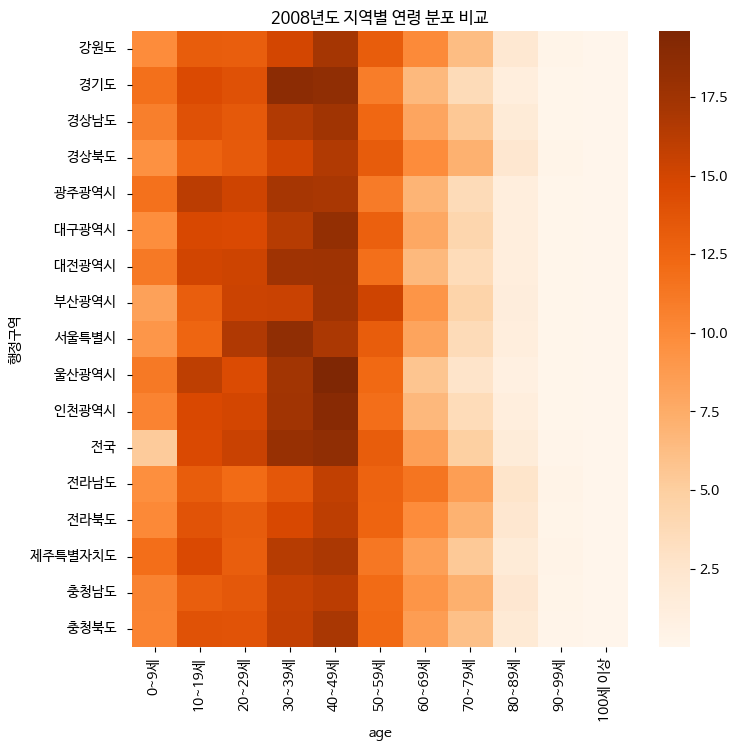

In [23]:
# 2008년도 지역별 연령 분포 비교
plt.figure(figsize=(8,8))
plt.title("2008년도 지역별 연령 분포 비교")
sns.heatmap(piv_data, cmap="Oranges")
plt.savefig("2008년도지역별연령분포비교.png")
plt.show()

In [24]:
# 2024년도 지역별 연령 분포 비교